In [45]:

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, precision_score, recall_score, f1_score
import numpy as np
import time
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
lending_club_df = pd.read_csv("./data/final_lending_club.csv")

In [5]:
lending_club_df.head()

,loan_amnt,funded_amnt,int_rate,installment,emp_length,annual_inc,zip_code,dti,delinq_2yrs,inq_last_6mths,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,28000.0,28000.0,7.62,872.52,5,325000.0,945,18.55,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,27600.0,27600.0,19.97,730.78,6,73000.0,802,23.13,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,24000.0,24000.0,13.53,814.80,10,100000.0,493,22.18,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,8000.0,8000.0,10.99,261.88,2,33000.0,800,15.75,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,11500.0,11500.0,22.90,323.54,4,32760.0,937,27.06,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
len([i for i in lending_club_df.columns]) # should be 150 (including the repaid column)

150

### Data Model
``` 'loan_amnt',
 'funded_amnt',
 'int_rate',
 'installment',
 'emp_length',
 'annual_inc',
 'zip_code',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'total_bal_il',
 'il_util',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'pub_rec_bankruptcies',
 'tax_liens',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'month',
 'term_ 36 months',
 'term_ 60 months',
 'grade_A',
 'grade_B',
 'grade_C',
 'grade_D',
 'grade_E',
 'grade_F',
 'grade_G',
 'home_ownership_ANY',
 'home_ownership_MORTGAGE',
 'home_ownership_NONE',
 'home_ownership_OTHER',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'purpose_car',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_house',
 'purpose_major_purchase',
 'purpose_medical',
 'purpose_moving',
 'purpose_other',
 'purpose_renewable_energy',
 'purpose_small_business',
 'purpose_vacation',
 'purpose_wedding',
 'addr_state_AK',
 'addr_state_AL',
 'addr_state_AR',
 'addr_state_AZ',
 'addr_state_CA',
 'addr_state_CO',
 'addr_state_CT',
 'addr_state_DC',
 'addr_state_DE',
 'addr_state_FL',
 'addr_state_GA',
 'addr_state_HI',
 'addr_state_IA',
 'addr_state_ID',
 'addr_state_IL',
 'addr_state_IN',
 'addr_state_KS',
 'addr_state_KY',
 'addr_state_LA',
 'addr_state_MA',
 'addr_state_MD',
 'addr_state_ME',
 'addr_state_MI',
 'addr_state_MN',
 'addr_state_MO',
 'addr_state_MS',
 'addr_state_MT',
 'addr_state_NC',
 'addr_state_ND',
 'addr_state_NE',
 'addr_state_NH',
 'addr_state_NJ',
 'addr_state_NM',
 'addr_state_NV',
 'addr_state_NY',
 'addr_state_OH',
 'addr_state_OK',
 'addr_state_OR',
 'addr_state_PA',
 'addr_state_RI',
 'addr_state_SC',
 'addr_state_SD',
 'addr_state_TN',
 'addr_state_TX',
 'addr_state_UT',
 'addr_state_VA',
 'addr_state_VT',
 'addr_state_WA',
 'addr_state_WI',
 'addr_state_WV',
 'addr_state_WY']'```

In [9]:
# target column
lending_club_df.repaid.head()

0    1
1    0
2    1
3    0
4    0
Name: repaid, dtype: int64

In [10]:
y_col = lending_club_df.repaid

In [11]:
x_cols = lending_club_df.ix[:,lending_club_df.columns!='repaid'] 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x_cols, y_col,test_size=.15)

In [13]:
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train,test_size=.15)

In [14]:
X_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961071 entries, 291614 to 113126
Columns: 149 entries, loan_amnt to addr_state_WY
dtypes: float64(65), int64(84)
memory usage: 1.1 GB


# Random Forest First

In [54]:
rf = RandomForestClassifier(n_estimators=300, n_jobs=-1) #n_jobs -1 parallelize the tree building

In [55]:
s = time.time()
rf.fit(X_t,y_t)
e = time.time()

In [56]:
print(f"training took {(e-s)/60} minutes")

training took 1092.2877010504405 minutes


In [57]:
rf.classes_

array([0, 1])

In [58]:
predictions = rf.predict(X_val)
positive_probability_predictions = rf.predict_proba(X_val)[:,1]

In [59]:
positive_probability_predictions

array([ 0.13666667,  0.51333333,  0.5       , ...,  0.12666667,
        0.17333333,  0.54666667])

### Initial Accuracy

In [61]:
accuracy_score(y_val, predictions)

0.76378677012517615

### Initial Recall and Precision

In [40]:
recall_score(y_val, predictions)

0.5501901208561687

In [41]:
precision_score(y_val, predictions)

0.66731622821262315

### Initial F1

In [47]:
f1_score(y_val, predictions)

0.60311931273360608

In [29]:
fpr, tpr, thresholds = roc_curve(y_val, positive_probability_predictions)

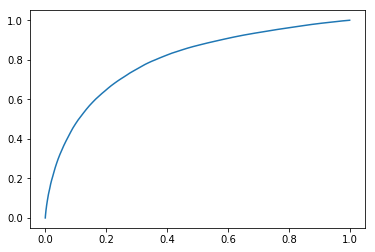

In [34]:
plt.plot(fpr,tpr)

### Adjust threshold
- We want to minimize the number of false positive (people who we think will pay back but don't)


In [49]:
p6_threshold = positive_probability_predictions>.6

In [50]:
accuracy_score(y_val, p6_threshold )

0.7468293229403129

In [51]:
precision_score(y_val,p6_threshold ) # up to 90% precision now

0.75670264965652601

In [52]:
recall_score(y_val, p6_threshold)

0.34412767552707213

In [53]:
f1_score(y_val, p6_threshold)

0.47310165415010064

In [19]:
lending_club_df.columns[np.argsort(rf.feature_importances_)[::-1]][:20]

Index(['max_bal_bc', 'total_bal_il', 'int_rate', 'all_util', 'dti',
       'mo_sin_old_rev_tl_op', 'revol_util', 'zip_code', 'bc_util',
       'installment', 'avg_cur_bal', 'mo_sin_old_il_acct', 'revol_bal',
       'tot_hi_cred_lim', 'tot_cur_bal', 'annual_inc', 'total_bal_ex_mort',
       'total_bc_limit', 'total_rev_hi_lim', 'total_il_high_credit_limit'],
      dtype='object')